In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv("C:\\Users\\HP\\Documents\\kaggle\\on house price prediction\\train.csv")
test=pd.read_csv("C:\\Users\\HP\\Documents\\kaggle\\on house price prediction\\test.csv")

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA

<AxesSubplot:>

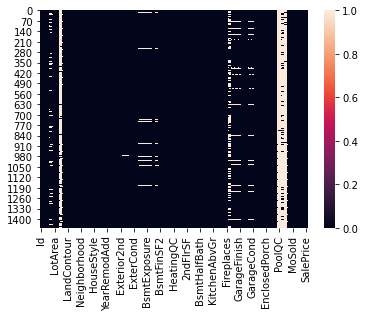

In [4]:
sns.heatmap(train.isnull())

<AxesSubplot:>

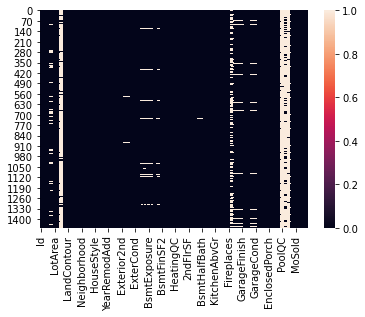

In [5]:
sns.heatmap(test.isnull())

In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train=train.drop(["Alley","PoolQC","MiscFeature","Fence","FireplaceQu",],axis=1)
test=test.drop(["Alley","PoolQC","MiscFeature","Fence","FireplaceQu",],axis=1)

In [9]:
train["LotFrontage"]=train["LotFrontage"].fillna(train["LotFrontage"].mean())
train["BsmtQual"]=train["BsmtQual"].fillna('TA')
train["BsmtCond"]=train["BsmtCond"].fillna('TA')
train["BsmtExposure"]=train["BsmtExposure"].fillna('No')
train["BsmtFinType1"]=train["BsmtFinType1"].fillna('Unf')
train["BsmtFinType2"]=train["BsmtFinType2"].fillna('Unf')
train["GarageType"]=train["GarageType"].fillna('Attchd')
train["GarageFinish"]=train["GarageFinish"].fillna('Unf')
train["GarageCars"]=train["GarageCars"].fillna(train["GarageCars"].mean())
train["GarageQual"]=train["GarageQual"].fillna('TA')
train["GarageCond"]=train["GarageCond"].fillna('TA')
train["MasVnrType"]=train["MasVnrType"].fillna('None')
train["MasVnrArea"]=train["MasVnrArea"].fillna(train["MasVnrArea"].mean())

In [10]:
test["LotFrontage"]=test["LotFrontage"].fillna(test["LotFrontage"].mean())
test["BsmtQual"]=test["BsmtQual"].fillna('TA')
test["BsmtCond"]=test["BsmtCond"].fillna('TA')
test["BsmtExposure"]=test["BsmtExposure"].fillna('No')
test["BsmtFinType1"]=test["BsmtFinType1"].fillna('Unf')
test["BsmtFinType2"]=test["BsmtFinType2"].fillna('Unf')
test["GarageType"]=test["GarageType"].fillna('Attchd')
test["GarageFinish"]=test["GarageFinish"].fillna('Unf')
test["GarageCars"]=test["GarageCars"].fillna(test["GarageCars"].mean())
test["GarageQual"]=test["GarageQual"].fillna('TA')
test["GarageCond"]=test["GarageCond"].fillna('TA')
test["MasVnrType"]=test["MasVnrType"].fillna('None')
test["GarageYrBlt"]=test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean())

In [11]:
train["GarageYrBlt"]=train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean())

In [12]:
train=train.dropna()

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [14]:
columns=['MSZoning','Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual',
       'Functional','GarageType','GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType',
       'SaleCondition',"GarageFinish"]

In [15]:
pas=[train,test]

In [16]:
data=pd.concat(pas)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [17]:
labelencoder = LabelEncoder()
for i in columns:
    data[i]= labelencoder.fit_transform(data[i])
    #test[i]=labelencoder.fit_transform(test[i])

In [18]:
train=data.iloc[0:1459,:]

In [19]:
test=data.iloc[1459:,:]
test=test.drop(["SalePrice"],axis=1)

In [20]:
x_train=train.iloc[:,0:75]
y_train=train.iloc[:,75:]

### XGBRegressor

In [21]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
pred=classifier.predict(test)

In [23]:
pred

array([118657.195, 144939.02 , 183024.94 , ..., 172548.75 , 123365.164,
       219484.61 ], dtype=float32)

In [24]:
df=pd.read_csv("C:\\Users\\HP\\Documents\\kaggle\\on house price prediction\\sample_submission.csv")

In [25]:
pred=pd.DataFrame(pred)
data=pd.concat([df['Id'],pred],axis=1)
data.columns=['ID','SalePrice']

In [26]:
data.head()

,ID,SalePrice
0,1461,118657.195312
1,1462,144939.015625
2,1463,183024.937500
3,1464,196810.984375
4,1465,186960.515625


In [27]:
data.to_csv("sample_submission0.csv",index=False)